## Basic Maze

#### a) MDP formulation

We propose the following MDP formulation: 

##### State space $\mathcal{S}$
We model the state space as the set of all possible positions of the player and all possible positions of the Minotaur in the maze. Formally, the state space is

$$\mathcal{S} = \big\lbrace (i,j,x,y):\textrm{such that the cell
} (i,j) \textrm{ is the position of the player and not an obstacle}, \\   (x,y) \textrm { is the position of the Minotaur}\big\rbrace.$$

##### Action space $\mathcal{A}$
We allow the player to chose to either move `left`, `right`, `down`, `up` or not move at all (`stay`). Note that sometimes the player cannot move in a certain direction because of an obstacle or a wall, yet we permit this to be action. We will see that this is not an issue as long as we define our transition probabilities and rewards appropriately.
Formally, the action space is

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$

##### Transition probabilities $\mathcal{P}$
Note that there is no randomness involved upon taking an action by the player. As a consequence, the transition probabilities are deterministic. More precisely, 
Only the player's next state is decided by the action deterministically. The action of the Minotaur is random and the transition probability is related to the position where the Minotaur is. 
- If at state (or position) $s$, the position of the Minotaur is in the middle of the map, then $\mathbb{P}(s' \vert s, a) = \frac{1}{4}$. 
- If at state (or position)  $s$ , the position of the Minotaur is in the borders of the map (not in the corners), then $\mathbb{P}(s' \vert s, a) = \frac{1}{3}$.
- If at state (or position)  $s$ , the position of the Minotaur is in the corners of the map, then $\mathbb{P}(s' \vert s, a) = \frac{1}{2}$.


##### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to caught by the Minotaur then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -1$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 0$. 
  
#### b) Moving in alternating rounds
The problem should be the same. Since it is a Markov process, the action decisions made by the player only depend on the status before the decisions are made. Under such context, although the player and the Minotaur don't move in the same round, we can still regard the two steps, the player moving first and the Minotaur moving later, as one step. 

In [1]:
import numpy as np
import maze_1 as mz

In [2]:
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0],
])

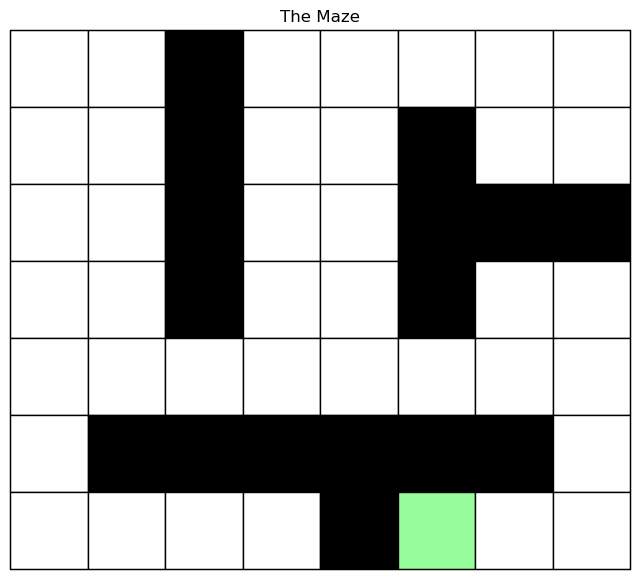

In [3]:
mz.draw_maze(maze)

In [4]:
env = mz.Maze(maze)
env.show()

[[   -1.         -1000.          -500.         -1000.
   -500.        ]
 [ -333.33333333 -1000.            -1.         -1000.
     -1.        ]
 [   -1.         -1000.          -333.33333333 -1000.
     -1.        ]
 ...
 [   -1.          -333.33333333 -1000.            -1.
  -1000.        ]
 [ -333.33333333    -1.         -1000.            -1.
  -1000.        ]
 [   -1.          -500.         -1000.          -500.
  -1000.        ]]


## Dynamic Programming

c) Solve the problem: find a policy that maximizes the probability of leaving the maze alive (in the shortest time possible) for T = 20. Illustrate this policy.

 The policy is solved as below. And the policy is a function related to the states and the time t. Such a function mapping can be illustrated as printed.

In [5]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);
np.set_printoptions(threshold=np.inf);
print(policy)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [4. 4. 4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 4. 4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2.

In [6]:
method = 'DynProg';
start  = (0, 0, 6, 5);
path, _= env.simulate(start, policy, method);

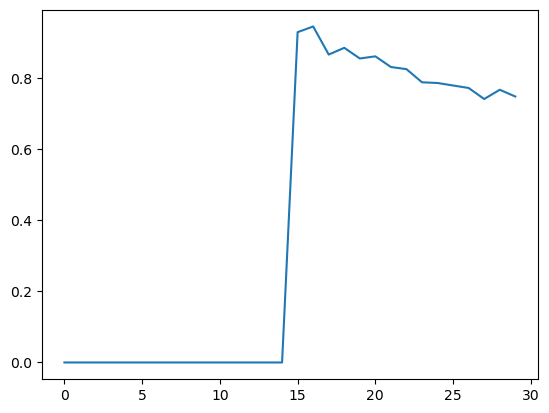

In [7]:
import matplotlib.pyplot as pyplt

N = 1000;
T = 31;
rate = [];
for t in range(1, T):
    success_cnt = 0;
    horizon = t;
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon);
    for i in range(0, N):
        method = 'DynProg';
        start  = (0, 0, 6, 5);
        path, flag= env.simulate(start, policy, method);
        if flag:
            success_cnt = success_cnt + 1;
    success_rate = success_cnt/N;
    rate.append(success_rate);

pyplt.plot(rate);